# 머신러닝 프로젝트

## Airbnb (New York City) 가격 예측하기

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

In [43]:
train.shape, test.shape

((39116, 16), (9779, 15))

In [44]:
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [46]:
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [47]:
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [48]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<AxesSubplot:>

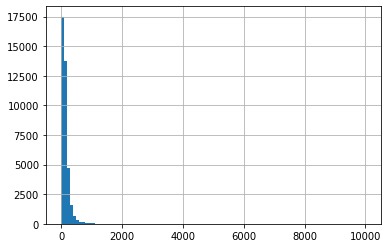

In [49]:
# target 히스토그램 확인하기
train['price'].hist(bins=100)

In [50]:
# 피쳐(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

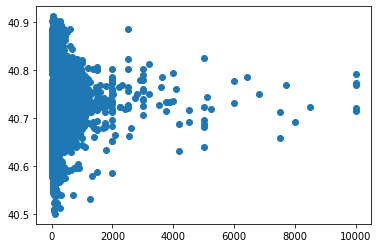

In [51]:
plt.scatter(train['price'], train['latitude'])

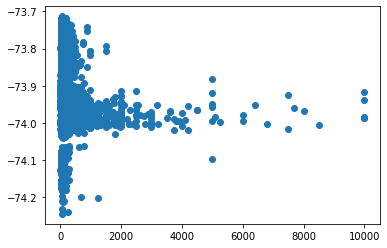

In [52]:
plt.scatter(train['price'], train['longitude'])

<AxesSubplot:>

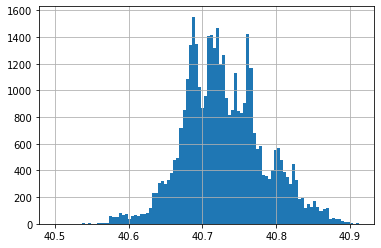

In [53]:
train['latitude'].hist(bins=100)

<AxesSubplot:>

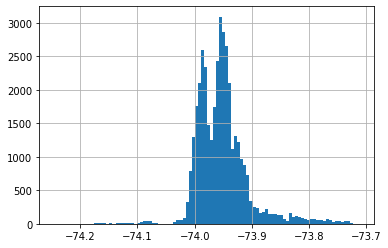

In [54]:
train['longitude'].hist(bins=100)

<AxesSubplot:>

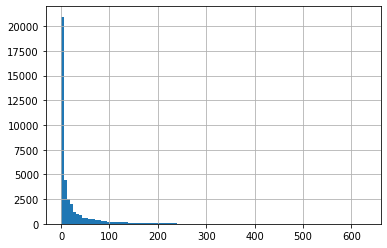

In [55]:
train['number_of_reviews'].hist(bins=100)

<AxesSubplot:>

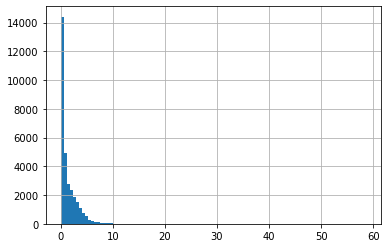

In [56]:
train['reviews_per_month'].hist(bins=100)

## 데이터 전처리

In [57]:
print(train['price'][:3])
print(np.log1p(train['price'])[:3])
print(np.expm1(np.log1p(train['price'])[:3]))

0     70
1    240
2    150
Name: price, dtype: int64
0    4.262680
1    5.484797
2    5.017280
Name: price, dtype: float64
0     70.0
1    240.0
2    150.0
Name: price, dtype: float64


<AxesSubplot:>

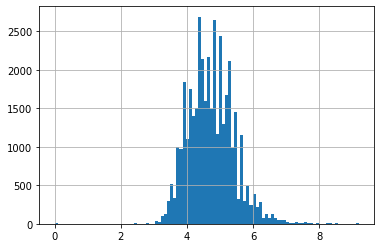

In [58]:
train['price'] = np.log1p(train['price'])
train['price'].hist(bins=100)

<AxesSubplot:>

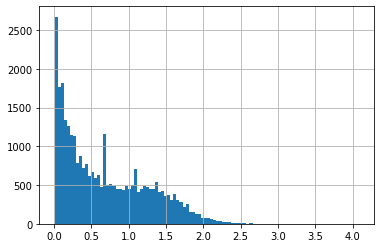

In [59]:
train['number_of_reviews'] = np.log1p(train['number_of_reviews'])
train['reviews_per_month'] = np.log1p(train['reviews_per_month'])
test['number_of_reviews'] = np.log1p(test['number_of_reviews'])
test['reviews_per_month'] = np.log1p(test['reviews_per_month'])

train['reviews_per_month'].hist(bins=100)

In [60]:
# 결측치 컬럼 삭제 (last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [61]:
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [62]:
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [63]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

In [72]:
# 수치형 피쳐 선택
# 수치형 데이터와 범주형 데이터 분리
cols = [
    'host_id',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[cols] = scaler.fit_transform(train[cols])
test[cols] = scaler.transform(test[cols])

display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,0.343458,Gilles,Manhattan,Harlem,0.731742,0.539318,Private room,0.001601,0.215072,0.021091,0.003067,0.000000
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",0.178671,Iradj,Manhattan,Hell's Kitchen,0.631633,0.478445,Entire home/apt,0.000801,0.647622,0.241268,0.003067,0.717808


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",0.123100,Rémy,Brooklyn,Williamsburg,0.508544,0.560563,Private room,0.001601,0.170441,0.066086,0.0,0.000000
1,971247,Sunny Artist Live/Work Apartment,0.019344,Larry,Manhattan,Upper West Side,0.712374,0.526034,Entire home/apt,0.001601,0.787371,0.276108,0.0,0.668493


In [75]:
# 범주형 변수 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = [
    'neighbourhood_group',
    'neighbourhood',
    'room_type'
]

for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,0.343458,Gilles,2,94,0.731742,0.539318,1,0.001601,0.215072,0.021091,0.003067,0.000000
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",0.178671,Iradj,2,95,0.631633,0.478445,0,0.000801,0.647622,0.241268,0.003067,0.717808


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",0.123100,Rémy,1,214,0.508544,0.560563,1,0.001601,0.170441,0.066086,0.0,0.000000
1,971247,Sunny Artist Live/Work Apartment,0.019344,Larry,2,202,0.712374,0.526034,0,0.001601,0.787371,0.276108,0.0,0.668493


In [76]:
del_cols=['id',
         'name',
         'host_name',
         ]

train = train.drop(del_cols, axis=1)
test = test.drop(del_cols, axis=1)

## 검증 데이터 분리

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 11), (7824, 11), (31292,), (7824,))

## 머신러닝

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = np.expm1(model.predict(X_val))
mean_squared_error(y_val, pred)

17978.673742428397

In [79]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = np.expm1(model.predict(X_val))
mean_squared_error(y_val, pred)

17959.72076702869

In [80]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = np.expm1(model.predict(X_val))
mean_squared_error(y_val, pred)

11985.613033071835

In [81]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = np.expm1(model.predict(X_val))
mean_squared_error(y_val, pred)

12024.466689374882

In [82]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = np.expm1(model.predict(X_val))
mean_squared_error(y_val, pred)

23995.984924561937

In [83]:
from xgboost import XGBRegressor
model = XGBRegressor()

model.fit(X_train, y_train)
pred = np.expm1(model.predict(X_val))
mean_squared_error(y_val, pred)

23476.228377339758

In [84]:
# 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [0.03, 0.05, 0.07, 0.1],
         'n_estimators': [500, 300, 100, 50],
          'max_depth': [3, 4, 5]}

xgb = XGBRegressor()
grid = GridSearchCV(xgb, params, cv=3, n_jobs=-1)
grid.fit(train, target)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [85]:
grid.best_params_

{'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 500}

In [86]:
xgb = XGBRegressor(learning_rate=0.07,
                  max_depth=5,
                  n_estimators=500)
xgb.fit(X_train, y_train)
pred = np.expm1(xgb.predict(X_val))
mean_squared_error(y_val, pred)

21934.081543788085

### 채점

In [87]:
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# y_test = np.log1p(y_test)
pred = np.expm1(xgb.predict(test))
mean_squared_error(y_test, pred)

44419.02964960232